# Assignment 3

## Sourcing data from URL.

Author: Kyra Menai Hamilton

Brief: 

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

Just creating the pie chart
Making it look nice
As always your code should be well laid out.

In [ ]:
# Import the modules needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


1. Source the data

In [27]:
# First need to save the data from the url.

df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


2. Make a pie chart

In [28]:
# The data needs to be cleaned to remove any rows with missing data.
df = df.dropna()
print(df.head(5)) # to check it worked.

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


In [29]:
# Now to make a pie chart we need to group the data by Job Title and count the number of User Id in each Job Title role.
grouped = df.groupby('Job Title').count()['User Id']
print(grouped)

Job Title
Academic librarian                      5
Accommodation manager                   2
Accountant, chartered                   1
Accountant, chartered certified         3
Accountant, chartered public finance    3
                                       ..
Water quality scientist                 2
Web designer                            3
Wellsite geologist                      1
Writer                                  3
Youth worker                            2
Name: User Id, Length: 519, dtype: int64


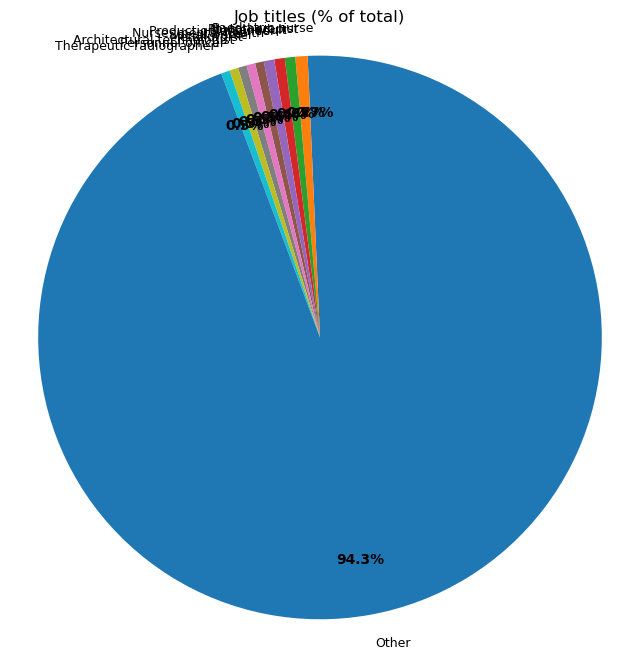

In [34]:
# Need to Enable inline plotting for this Jupyter Notebook.
# %matplotlib inline
# Create a pie chart showing percentage of total for each Job Title.
# We'll group less common job titles into 'Other' if there are many categories to keep the chart readable.
counts = df['Job Title'].value_counts()
# Decide how many slices to show (top_n). Remaining will be grouped into 'Other'
top_n = 10
if len(counts) > top_n:
    top = counts.iloc[:top_n]
    other = counts.iloc[top_n:].sum()
    labels = list(top.index) + ['Other']
    sizes = list(top.values) + [other]
else:
    labels = list(counts.index)
    sizes = list(counts.values)

# Convert sizes to percentages of the total
total = sum(sizes)
percent_sizes = [s / total * 100 for s in sizes]

fig, ax = plt.subplots(figsize=(8, 8))
# Explode the largest slice slightly for emphasis
# explode = [0.05 if i == 0 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Job titles (% of total)')
# Improve text size
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=9)

plt.show()


Sex
Male      506
Female    494
Name: count, dtype: int64


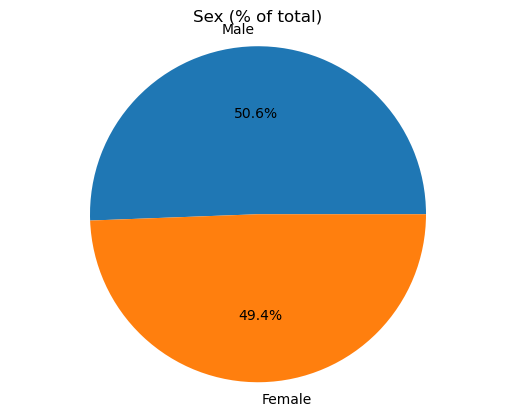

In [38]:
# Plot the data on a pie chart to visualise the percentage of each sex in the dataset.
countsmf = df['Sex'].value_counts()
print(countsmf) # to check it worked.

# Create a pie chart showing percentage of total for each sex.
labels = 'Male', 'Female'
sizes = [506, 494]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Sex (% of total)')
plt.show()

In [ ]:
# Now to divide the whole dataset into 2. one male and one female.
# then one pie chart for each showing the percentage job title role for each sex.

df_male = df[df['Sex'] == 'Male']
df_female = df[df['Sex'] == 'Female']
print(df_male.head(5)) # to check it worked.
print(df_female.head(5)) # to check it worked.
# Now to make a pie chart we need to group the data by Job Title and count the number of User Id in each Job Title role.
grouped_male = df_male.groupby('Job Title').count()['User Id']
grouped_female = df_female.groupby('Job Title').count()['User Id']
print(grouped_male)
print(grouped_female)

   Index          User Id First Name Last Name   Sex                   Email  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney  Male     pwarner@example.org   
3      4  BF2a889C00f0cE1    Whitney    Hooper  Male   zjohnston@example.com   
5      6  aF75e6dDEBC5b66     Sherry  Caldwell  Male   kaitlin13@example.net   
6      7  efeb05c7Cc94EA3     Ernest   Hoffman  Male  jeffharvey@example.com   
7      8  fb1BF3FED57E9d7      Doris  Andersen  Male    alicia33@example.org   

               Phone Date of birth                  Job Title  
0       857.139.8239    2014-01-27          Probation officer  
3    +1-939-130-6258    2012-11-17   Counselling psychologist  
5         8537800927    1917-08-06  Higher education lecturer  
6  093.655.7480x7895    1984-12-22             Health visitor  
7         4709522945    2016-12-02                 Air broker  
    Index          User Id First Name Last Name     Sex  \
1       2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2       3  810Ce0

# END